# Neural & Behavioral Modeling - Week 3 (Exercises)
by Your Name (Your Email)

In [7]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Nonlinear love triangle (5 points)

Please use Euler integration with a small step size (say dt=0.01) and the suggested parameters (a,b,c,d,e,f)=(-3,4,-7,2,2,-1) to simulate Eq.(5) in the following paper:

Sprott, J. C. (2004). Dynamical models of love. Nonlinear dynamics, psychology, and life sciences, 8(3), 303-314.

### 1.1  Coding the simulation (3 points)

Please use differnt colors/shapes to put Rj(t), J, Rg(t), & G(t) curves in the same plot.

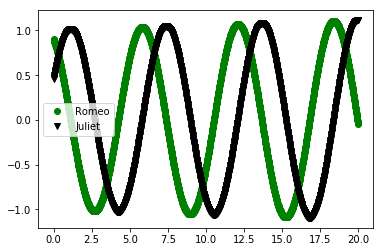

In [28]:
a,b=1,1 # Model parameters
r,j=[0.9],[0.456] # Initial values
dt=.01 # step size for numerical integration
t=arange(0,20,dt) # integration period
for i in t:
    r1,j1=r[-1],j[-1], # the last element
    r2=r1-dt*a*j1 # Euler integration
    j2=j1+dt*b*r1 # Euler integration
    r.append(r2)
    j.append(j2)
plot(t,r[0:-1],'go') # Romeo
plot(t,j[0:-1],'kv') # Juliet
legend(['Romeo','Juliet']);

### 1.2 Studying chaos (2 points)

Please provide two sets of initial values of (Rj, J, Rg, & G) that can produce distinct model behaviors.

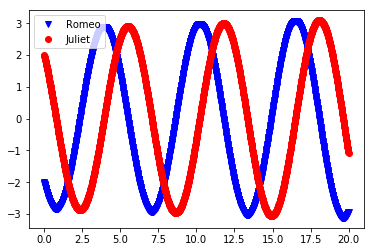

In [29]:
a,b=1,1 # Model parameters
r,j=[-2],[2] # Initial values
dt=.01 # step size for numerical integration
t=arange(0,20,dt) # integration period
for i in t:
    r1,j1=r[-1],j[-1], # the last element
    r2=r1-dt*a*j1 # Euler integration
    j2=j1+dt*b*r1 # Euler integration
    r.append(r2)
    j.append(j2)
plot(t,r[0:-1],'bv') # Romeo
plot(t,j[0:-1],'ro') # Juliet
legend(['Romeo','Juliet']);

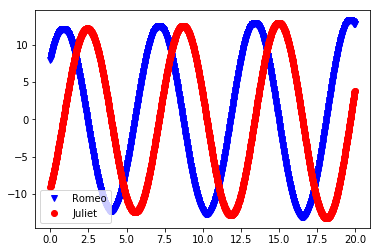

In [32]:
a,b=1,1 # Model parameters
r,j=[8],[-9] # Initial values
dt=.01 # step size for numerical integration
t=arange(0,20,dt) # integration period
for i in t:
    r1,j1=r[-1],j[-1], # the last element
    r2=r1-dt*a*j1 # Euler integration
    j2=j1+dt*b*r1 # Euler integration
    r.append(r2)
    j.append(j2)
plot(t,r[0:-1],'bv') # Romeo
plot(t,j[0:-1],'ro') # Juliet
legend(['Romeo','Juliet']);

## 2 Fix the simulation of "Tragedy of the Commons" (5 points)

Tren's simulation of <a href="https://en.wikipedia.org/wiki/System_archetype#Tragedy_of_the_commons">Tragedy of the Commons</a> ported from STELLA to PYTHON did not reproduce the follow model dynamics:

<img src= http://wiki.mbalib.com/w/images/1/13/%E5%85%B1%E5%90%8C%E7%9A%84%E6%82%B2%E5%89%A7%E6%A8%A1%E6%8B%9F%E7%BB%93%E6%9E%9C.jpg>

Please help Tren to fix his broken(?) simulation:

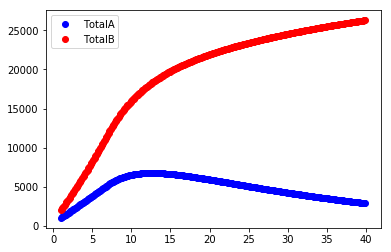

In [31]:
TotalRes=100 # Model parameter
TotalA,TotalB=[1000],[2000] # Initial value
IncomeAA,IncomeBB = [],[]
dt=.1 # step size for numerical integration
t=arange(1,40,dt) # integration period
for i in t:
    TotalA1,TotalB1=TotalA[-1],TotalB[-1] # the last element
    ProjectA=TotalA1/500 
    ProjectB=TotalB1/500
    ResPerProject=TotalRes/(ProjectA+ProjectB)
    Risk=0 if ResPerProject >= 3 else 3-ResPerProject
    IncomeA=ProjectA*10+ProjectA*ResPerProject*20-Risk*ProjectA*50
    IncomeB=ProjectB*20+ProjectB*ResPerProject*20-Risk*ProjectB*40
    IncomeAA.append(IncomeA)
    IncomeBB.append(IncomeB)
    TotalA2=TotalA1+dt*IncomeA#-delta*Risk*TotalA1 # Euler integration
    TotalB2=TotalB1+dt*IncomeB#-delta*Risk*TotalB1 # Euler integration
    TotalA.append(TotalA2)
    TotalB.append(TotalB2)
plot(t,TotalA[0:-1],'bo')
plot(t,TotalB[0:-1],'ro')
legend(['TotalA','TotalB']);

Please ignore the physical meanings of those obscure expressions like the definition of Risk:

<center><i>Risk=0 if ResPerProject >= 3 else (3-ResPerProject)</i></center>

Just by looking at Tren's figure, we know that TotalB did not collapse like TotalA when the resource per project (i.e., ResPerProject) became exhausted.

Please check the excitation and inhibiton terms for "TotalA" & "TotalB" and do whatever you can to collapse both variables for small ResPerProject. Note that this is exactly the thinking/experimental process of how a modeller revises his/her model to better fit data.

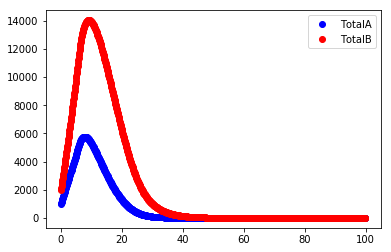

In [32]:
TotalRes=100 # Model parameter
TotalA,TotalB=[1000],[2000] # Initial value
IncomeAA,IncomeBB = [],[]
dt=.1 # step size for numerical integration
t=arange(0,100,dt) # integration period
for i in t:
    TotalA1,TotalB1=TotalA[-1],TotalB[-1] # the last element
    #ResPerProject1 = ResPerProject[-1]
    ProjectA=TotalA1/500
    ProjectB=TotalB1/500
    ResPerProject=TotalRes/(ProjectA+ProjectB)
    Risk=0 if ResPerProject>= 3 else 3-ResPerProject
    IncomeA=ProjectA*10+ProjectA*ResPerProject*20-ProjectA*Risk*50
    IncomeB=ProjectB*20+ProjectB*ResPerProject*20-ProjectB*Risk*40
    
    if ResPerProject<3 and TotalRes>0:
        TotalRes -= 0.5*ResPerProject
        
    TotalA2=TotalA1+dt*IncomeA#-delta*Risk*TotalA1 # Euler integration
    TotalB2=TotalB1+dt*IncomeB#-delta*Risk*TotalB1 # Euler integration
    TotalA.append(TotalA2)
    TotalB.append(TotalB2)
plot(t,TotalA[0:-1],'bo')
plot(t,TotalB[0:-1],'ro')
legend(['TotalA','TotalB']);